# load dataset rockerritesh/maithiliNewsData

In [1]:
from datasets import load_dataset

dataset = load_dataset("rockerritesh/maithiliNewsData", split="train")

print(dataset[0])

/Users/sumityadav/Documents/research/maiBert/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'text': 'शीतलं निर्मलं तोयं कर्पूरेण सुवासितम्। आचम्यतां जलं ह्येतत् प्रसीद परमेश्वरि॥ ॐ महालक्ष्म्यै नम:, आचमनीयं जलं समर्पयामि। (नैवेद्य निवेदन करबाक बाक आचमन लेल जल दी।)', 'labels': 'Culture'}


In [2]:
df = dataset.to_pandas()
df.head()

,text,labels
0,शीतलं निर्मलं तोयं कर्पूरेण सुवासितम्। आचम्यता...,Culture
1,देश भरि मे मंदिर के संख्या कतेक अछि ई सवाल आर्...,Entertainment
2,सो काल-खण्डमा कलम चलाउने कारीगरहरुले मातृशक्ति...,Culture
3,सिनेमाक निर्माण करबाक अछि।काठमांडू के मोएक्स ह...,Entertainment
4,मंगलवार क॑ राजधानी डुप्लीकेट ईस्ट वेस्ट कॉन्टा...,EduTech


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14

In [4]:
# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nLabel Distribution:")
print(df['labels'].value_counts())
print("\nUnique Labels:", df['labels'].nunique())
print("Labels:", df['labels'].unique().tolist())

Dataset Shape: (12383, 2)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12383 entries, 0 to 12382
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12376 non-null  object
 1   labels  12383 non-null  object
dtypes: object(2)
memory usage: 193.6+ KB
None

Label Distribution:
labels
Culture          2575
Literature       2212
Politics         2075
Sports           1774
Entertainment     844
Opinion           805
EduTech           619
Economy           549
Health            506
Interview         424
Name: count, dtype: int64

Unique Labels: 10
Labels: ['Culture', 'Entertainment', 'EduTech', 'Health', 'Economy', 'Literature', 'Opinion', 'Sports', 'Politics', 'Interview']


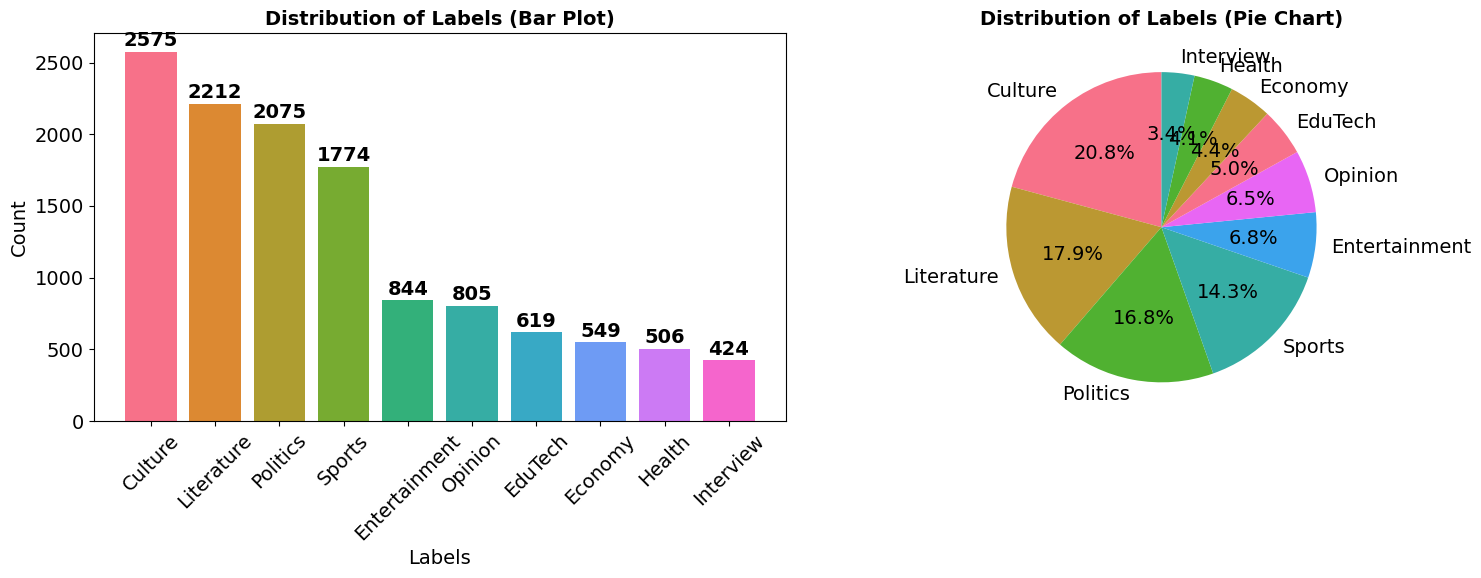

In [5]:
# 1. Label Distribution Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
label_counts = df['labels'].value_counts()
axes[0].bar(label_counts.index, label_counts.values, color=sns.color_palette("husl", len(label_counts)))
axes[0].set_title('Distribution of Labels (Bar Plot)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(label_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Labels (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [6]:
# Add text analysis columns with data validation
df['text'] = df['text'].fillna('')  # Handle any NaN values
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
df['sentence_count'] = df['text'].str.split('[।!?]').str.len()

# Fix any zero values that might cause division issues later
df['word_count'] = df['word_count'].replace(0, 1)  # Avoid division by zero
df['sentence_count'] = df['sentence_count'].replace(0, 1)  # Avoid division by zero

# Data validation
print("🔍 DATA VALIDATION:")
print(f"   • NaN values in text: {df['text'].isnull().sum()}")
print(f"   • Empty texts: {(df['text'].str.len() == 0).sum()}")
print(f"   • Zero word counts: {(df['word_count'] == 0).sum()}")
print(f"   • Infinite values in text_length: {np.isinf(df['text_length']).sum()}")
print(f"   • Infinite values in word_count: {np.isinf(df['word_count']).sum()}")

print("\nText Length Statistics:")
print(df['text_length'].describe())
print("\nWord Count Statistics:")
print(df['word_count'].describe())
print("\nSentence Count Statistics:")
print(df['sentence_count'].describe())

🔍 DATA VALIDATION:
   • NaN values in text: 0
   • Empty texts: 7
   • Zero word counts: 0
   • Infinite values in text_length: 0
   • Infinite values in word_count: 0

Text Length Statistics:
count    12383.000000
mean       872.772591
std        876.017370
min          0.000000
25%        225.000000
50%        456.000000
75%       1265.000000
max       5277.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    12383.000000
mean       158.615844
std        158.986193
min          1.000000
25%         38.000000
50%         86.000000
75%        230.500000
max        512.000000
Name: word_count, dtype: float64

Sentence Count Statistics:
count    12383.000000
mean         9.535654
std          9.475171
min          1.000000
25%          3.000000
50%          6.000000
75%         13.000000
max         86.000000
Name: sentence_count, dtype: float64


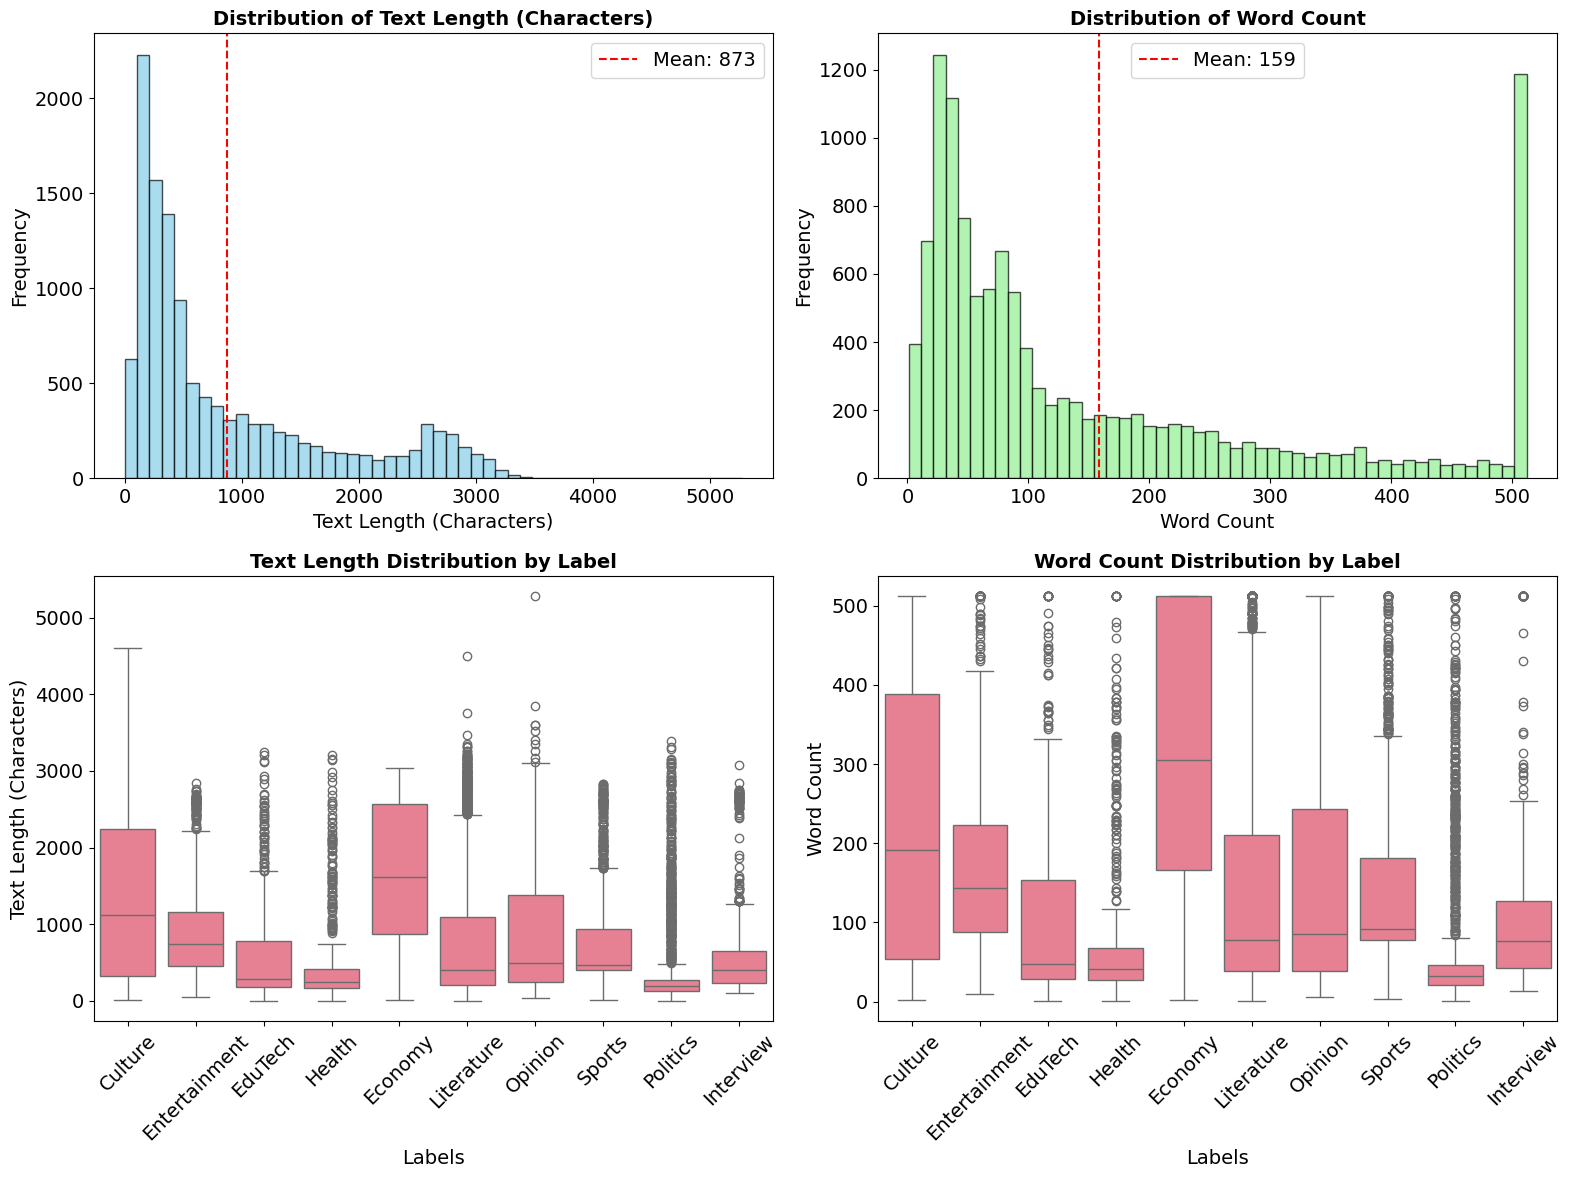

In [7]:
# 2. Text Length Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Text Length Distribution
axes[0,0].hist(df['text_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Text Length (Characters)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Text Length (Characters)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["text_length"].mean():.0f}')
axes[0,0].legend()

# Word Count Distribution
axes[0,1].hist(df['word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribution of Word Count', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Word Count')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["word_count"].mean():.0f}')
axes[0,1].legend()

# Box plot - Text Length by Label
sns.boxplot(data=df, x='labels', y='text_length', ax=axes[1,0])
axes[1,0].set_title('Text Length Distribution by Label', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Labels')
axes[1,0].set_ylabel('Text Length (Characters)')
axes[1,0].tick_params(axis='x', rotation=45)

# Box plot - Word Count by Label
sns.boxplot(data=df, x='labels', y='word_count', ax=axes[1,1])
axes[1,1].set_title('Word Count Distribution by Label', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Labels')
axes[1,1].set_ylabel('Word Count')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


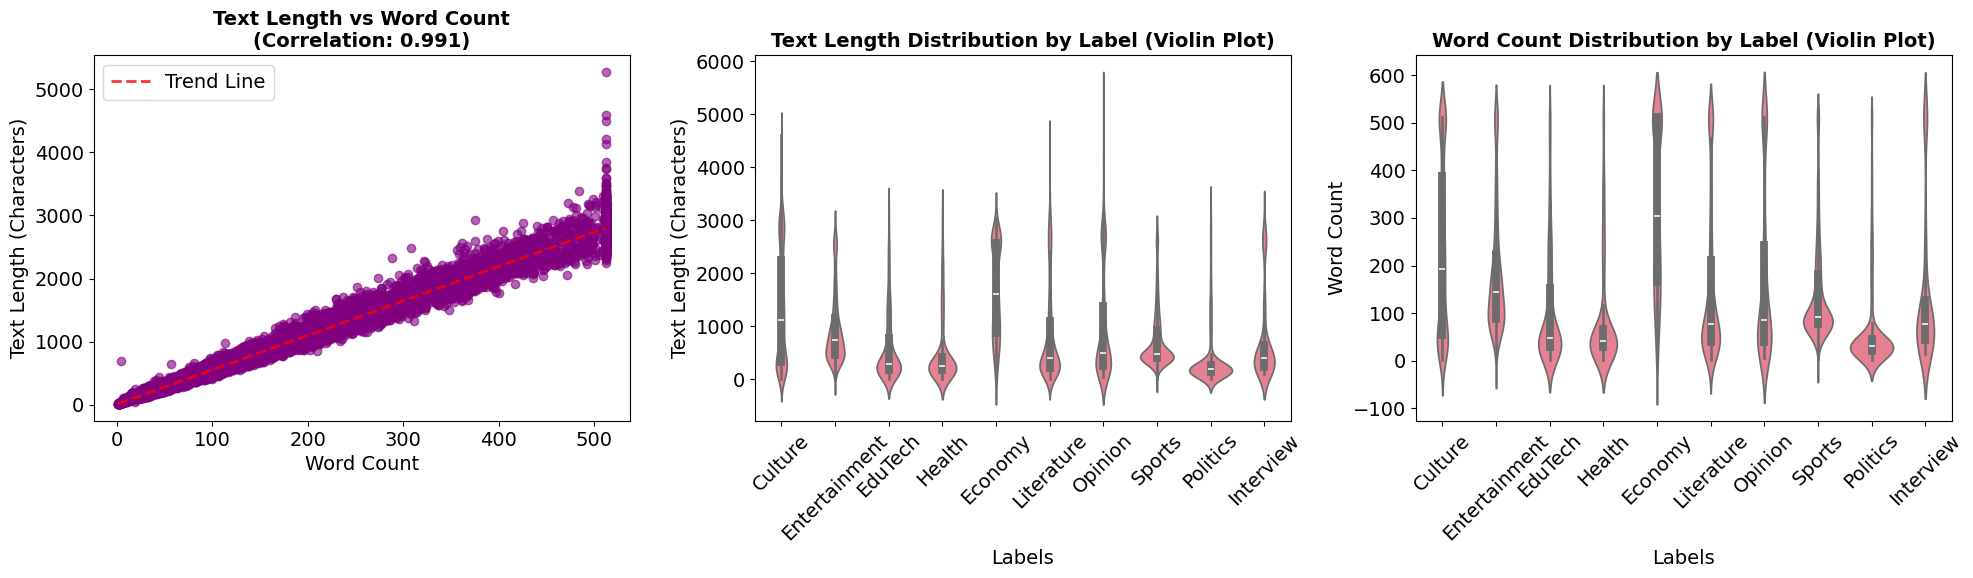

In [8]:
# 3. Correlation and Violin plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Clean data for correlation analysis
clean_df = df.dropna(subset=['word_count', 'text_length'])
clean_df = clean_df[(clean_df['word_count'] > 0) & (clean_df['text_length'] > 0)]
clean_df = clean_df[np.isfinite(clean_df['word_count']) & np.isfinite(clean_df['text_length'])]

# Correlation between text length and word count
axes[0].scatter(clean_df['word_count'], clean_df['text_length'], alpha=0.6, color='purple')
correlation = clean_df['word_count'].corr(clean_df['text_length'])
axes[0].set_title(f'Text Length vs Word Count\n(Correlation: {correlation:.3f})', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Text Length (Characters)')

# Add trend line with error handling
try:
    if len(clean_df) > 1 and clean_df['word_count'].std() > 0:
        z = np.polyfit(clean_df['word_count'], clean_df['text_length'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(clean_df['word_count'].min(), clean_df['word_count'].max(), 100)
        axes[0].plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label='Trend Line')
        axes[0].legend()
    else:
        print("Warning: Unable to fit trend line due to insufficient data variation")
except Exception as e:
    print(f"Warning: Could not fit trend line: {e}")
    # Continue without trend line

# Violin plot - Text Length by Label
sns.violinplot(data=df, x='labels', y='text_length', ax=axes[1])
axes[1].set_title('Text Length Distribution by Label (Violin Plot)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Text Length (Characters)')
axes[1].tick_params(axis='x', rotation=45)

# Violin plot - Word Count by Label
sns.violinplot(data=df, x='labels', y='word_count', ax=axes[2])
axes[2].set_title('Word Count Distribution by Label (Violin Plot)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Labels')
axes[2].set_ylabel('Word Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


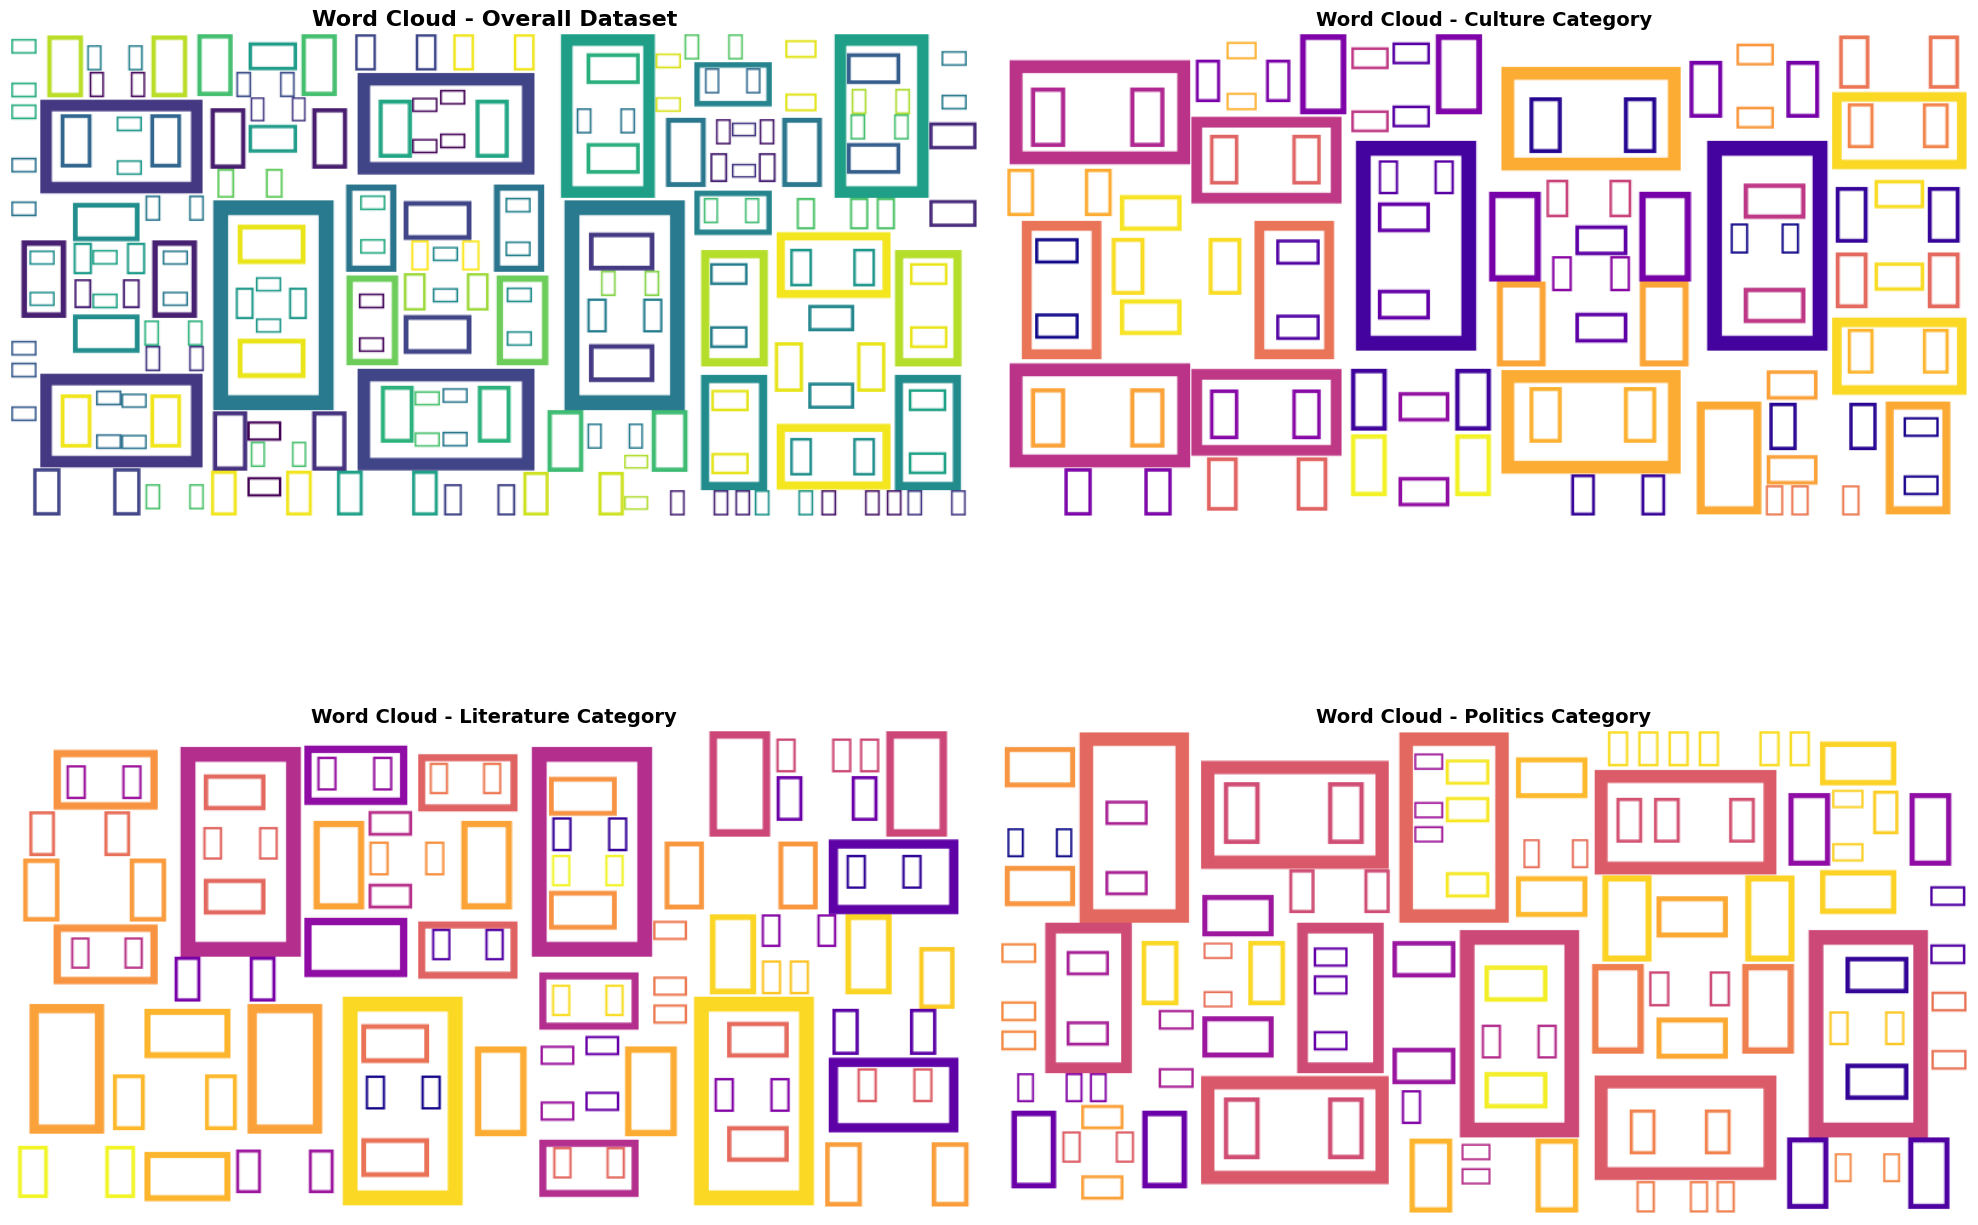

In [9]:
# 5. Word Clouds
# Overall word cloud
try:
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # Overall word cloud
    all_text = ' '.join(df['text'].astype(str))
    wordcloud_overall = WordCloud(width=800, height=400, 
                                 background_color='white',
                                 max_words=100,
                                 colormap='viridis').generate(all_text)
    
    axes[0,0].imshow(wordcloud_overall, interpolation='bilinear')
    axes[0,0].set_title('Word Cloud - Overall Dataset', fontsize=16, fontweight='bold')
    axes[0,0].axis('off')
    
    # Word cloud by top 3 categories
    top_labels = df['labels'].value_counts().head(3).index.tolist()
    
    for i, label in enumerate(top_labels):
        if i < 3:  # Only plot top 3 categories
            row = (i + 1) // 2
            col = (i + 1) % 2
            
            label_text = ' '.join(df[df['labels'] == label]['text'].astype(str))
            wordcloud_label = WordCloud(width=800, height=400,
                                       background_color='white',
                                       max_words=50,
                                       colormap='plasma').generate(label_text)
            
            axes[row, col].imshow(wordcloud_label, interpolation='bilinear')
            axes[row, col].set_title(f'Word Cloud - {label} Category', fontsize=14, fontweight='bold')
            axes[row, col].axis('off')
    
    # Hide the last subplot if only 3 categories
    if len(top_labels) == 3:
        axes[1,1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Could not generate word clouds: {e}")
    print("This might be due to missing wordcloud package. Install it with: pip install wordcloud")


Summary Statistics by Category:
               Text_Length_Mean  Text_Length_Std  Text_Length_Min  \
labels                                                              
Culture                 1330.24          1029.38               14   
Economy                 1634.66           854.23                8   
EduTech                  597.63           661.41                2   
Entertainment            944.65           655.41               52   
Health                   514.59           655.61                0   
Interview                722.49           800.64              100   
Literature               827.24           881.38                0   
Opinion                  973.90           984.79               41   
Politics                 388.08           573.15                0   
Sports                   750.68           564.71               13   

               Text_Length_Max  Word_Count_Mean  Word_Count_Std  \
labels                                                            
Cultu

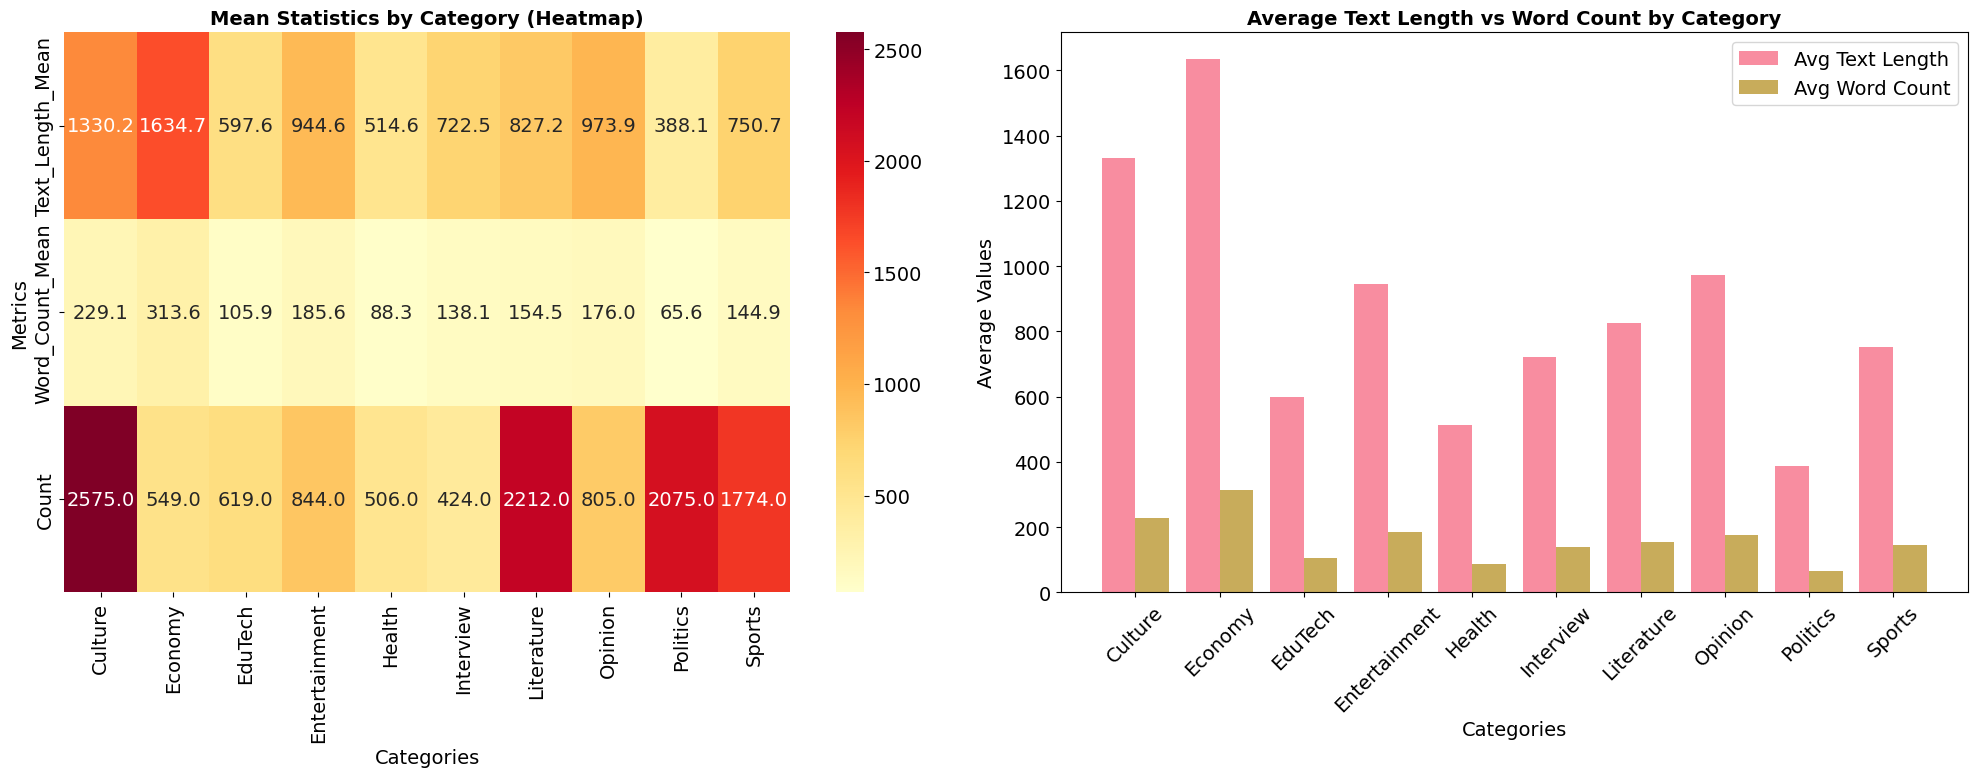

In [10]:
# 6. Category-wise Analysis
# Summary statistics by category
print("Summary Statistics by Category:")
print("="*50)

category_stats = df.groupby('labels').agg({
    'text_length': ['mean', 'std', 'min', 'max'],
    'word_count': ['mean', 'std', 'min', 'max'],
    'text': 'count'
}).round(2)

category_stats.columns = ['Text_Length_Mean', 'Text_Length_Std', 'Text_Length_Min', 'Text_Length_Max',
                         'Word_Count_Mean', 'Word_Count_Std', 'Word_Count_Min', 'Word_Count_Max', 'Count']

print(category_stats)

# Create heatmap of category statistics
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap of mean values
mean_stats = category_stats[['Text_Length_Mean', 'Word_Count_Mean', 'Count']]
sns.heatmap(mean_stats.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Mean Statistics by Category (Heatmap)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Metrics')

# Comparative bar plot
categories = category_stats.index
x_pos = np.arange(len(categories))

axes[1].bar(x_pos - 0.2, category_stats['Text_Length_Mean'], 0.4, label='Avg Text Length', alpha=0.8)
axes[1].bar(x_pos + 0.2, category_stats['Word_Count_Mean'], 0.4, label='Avg Word Count', alpha=0.8)

axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Average Values')
axes[1].set_title('Average Text Length vs Word Count by Category', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(categories, rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


In [11]:
df

,text,labels,text_length,word_count,sentence_count
0,शीतलं निर्मलं तोयं कर्पूरेण सुवासितम्। आचम्यता...,Culture,163,24,4
1,देश भरि मे मंदिर के संख्या कतेक अछि ई सवाल आर्...,Entertainment,270,54,3
2,सो काल-खण्डमा कलम चलाउने कारीगरहरुले मातृशक्ति...,Culture,244,35,2
3,सिनेमाक निर्माण करबाक अछि।काठमांडू के मोएक्स ह...,Entertainment,812,142,6
4,मंगलवार क॑ राजधानी डुप्लीकेट ईस्ट वेस्ट कॉन्टा...,EduTech,2220,412,16
...,...,...,...,...,...
12378,नए पत्रिकाबुतुवाल २५ फीट २ रुपांडेही केरऽ पुरथ...,Economy,857,152,8
12379,सलमान किक के साथ काम करी रहलऽ ई हीरोइन जैकलिन ...,Entertainment,568,111,6
12380,",सब केँ प्रणाम कयकेँ जे व्यक्ति घर सँ जाएत अछि...",Opinion,202,43,4
12381,नेपाल सरकार न॑ कहल॑ छै कि फिल्म सीपी शर्मा ओली...,Entertainment,730,152,8


In [12]:
df.to_csv("data/maibert_dataset.csv", index=False)

# text data

In [13]:
import os
os.listdir("data/DATA 2/FOR_MODEL_FINE+TUNNING")

['mai_wiki.txt',
 '.DS_Store',
 'data_xml_book.txt',
 'news.txt',
 'book.txt',
 'news',
 'merged_book_and_news_output.txt',
 'book text']

In [14]:
# merge 'data_xml_book.txt', 'merged_book_and_news_output.txt', 'mai_wiki.txt'

import os

# List of files to merge
files = [
    'data/DATA 2/FOR_MODEL_FINE+TUNNING/data_xml_book.txt',
    'data/DATA 2/FOR_MODEL_FINE+TUNNING/merged_book_and_news_output.txt',
    'data/DATA 2/FOR_MODEL_FINE+TUNNING/mai_wiki.txt'
]

content = ""
# Read and merge the files
for file in files:
    with open(file, 'r') as f:
        content += f.read()

# Write the merged content to a new file
with open('merged_data.txt', 'w') as f:
    f.write(content)

## viz

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import re
import unicodedata
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for better Devanagari text support
plt.rcParams['font.family'] = ['Noto Sans Devanagari', 'DejaVu Sans', 'Arial Unicode MS']
plt.style.use('seaborn-v0_8')

class DevanagariTextVisualizer:
    def __init__(self, file_path):
        """Initialize the visualizer with text data"""
        self.file_path = file_path
        self.text_data = self.load_data()
        self.devanagari_chars = self.extract_devanagari_chars()
        
    def load_data(self):
        """Load and read the text file"""
        try:
            with open(self.file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            return content
        except Exception as e:
            print(f"Error loading file: {e}")
            return ""
    
    def extract_devanagari_chars(self):
        """Extract all Devanagari characters from the text"""
        devanagari_pattern = r'[\u0900-\u097F]'
        chars = re.findall(devanagari_pattern, self.text_data)
        return chars
    
    def get_character_frequency(self):
        """Get frequency count of each Devanagari character"""
        return Counter(self.devanagari_chars)
    
    def get_word_frequency(self):
        """Get frequency count of Devanagari words"""
        # Split text into words (considering Devanagari word boundaries)
        words = re.findall(r'[\u0900-\u097F]+', self.text_data)
        return Counter(words)
    
    def get_text_statistics(self):
        """Get basic statistics about the text"""
        total_chars = len(self.text_data)
        devanagari_chars = len(self.devanagari_chars)
        words = len(re.findall(r'[\u0900-\u097F]+', self.text_data))
        lines = len(self.text_data.split('\n'))
        
        return {
            'Total Characters': total_chars,
            'Devanagari Characters': devanagari_chars,
            'Words': words,
            'Lines': lines,
            'Devanagari Percentage': (devanagari_chars / total_chars * 100) if total_chars > 0 else 0
        }
    
    def plot_character_frequency(self, top_n=20, filename="character_frequency.png"):
        """Plot frequency of top N Devanagari characters and save as high-quality image"""
        char_freq = self.get_character_frequency()
        top_chars = dict(char_freq.most_common(top_n))
        
        plt.figure(figsize=(12, 8))
        chars = list(top_chars.keys())
        frequencies = list(top_chars.values())
        
        bars = plt.bar(chars, frequencies, color='skyblue', alpha=0.8)
        
        # Titles and axis labels
        plt.title(f'Top {top_n} Most Frequent Devanagari Characters',
                fontsize=18, fontweight='bold')
        plt.xlabel('Characters', fontsize=14, fontweight='bold')
        plt.ylabel('Frequency', fontsize=14, fontweight='bold')
        
        # Tick labels
        plt.xticks(rotation=0, fontsize=12, fontweight='bold')
        plt.yticks(fontsize=12, fontweight='bold')
        
        # Add frequency labels on bars
        for bar, freq in zip(bars, frequencies):
            plt.text(bar.get_x() + bar.get_width()/2,
                    bar.get_height() + max(frequencies)*0.01,
                    str(freq),
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save as high-quality image
        plt.show()

    
    def plot_word_frequency(self, top_n=15, filename="word_frequency.png"):
        """Plot frequency of top N Devanagari words and save as high-quality image"""
        word_freq = self.get_word_frequency()
        top_words = dict(word_freq.most_common(top_n))
        
        plt.figure(figsize=(12, 8))
        words = list(top_words.keys())
        frequencies = list(top_words.values())
        
        bars = plt.barh(words, frequencies, color='lightcoral', alpha=0.7)
        
        # Titles and labels
        plt.title(f'Top {top_n} Most Frequent Devanagari Words',
                fontsize=18, fontweight='bold')
        plt.xlabel('Frequency', fontsize=14, fontweight='bold')
        plt.ylabel('Words', fontsize=14, fontweight='bold')
        
        # Tick labels
        plt.xticks(fontsize=12, fontweight='bold')
        plt.yticks(fontsize=12, fontweight='bold')
        
        plt.gca().invert_yaxis()  # Highest frequency on top
        
        # Add frequency labels on bars
        for bar, freq in zip(bars, frequencies):
            plt.text(bar.get_width() + 0.5,
                    bar.get_y() + bar.get_height()/2,
                    str(freq),
                    ha='left', va='center',
                    fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save as high-quality image
        plt.show()

    
    def plot_text_statistics(self, filename="text_statistics.png"):
        """Plot basic text statistics and save as high-quality image"""
        stats = self.get_text_statistics()
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bar plot of statistics
        stat_names = list(stats.keys())[:-1]  # Exclude percentage
        stat_values = list(stats.values())[:-1]
        
        bars = ax1.bar(stat_names, stat_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
        ax1.set_title('Text Statistics', fontsize=16, fontweight='bold')
        ax1.set_ylabel('Count', fontsize=14, fontweight='bold')
        ax1.tick_params(axis='x', rotation=45, labelsize=12)
        ax1.tick_params(axis='y', labelsize=12)
        
        # Add value labels on bars
        for bar, value in zip(bars, stat_values):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(stat_values)*0.01,
                    str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        # Pie chart for character distribution
        devanagari_chars = stats['Devanagari Characters']
        other_chars = stats['Total Characters'] - devanagari_chars
        
        wedges, texts, autotexts = ax2.pie(
            [devanagari_chars, other_chars],
            labels=['Devanagari', 'Other'],
            autopct='%1.1f%%',
            colors=['#FF6B6B', '#E0E0E0'],
            startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold'}
        )
        ax2.set_title('Character Distribution', fontsize=16, fontweight='bold')
        
        # Save as high-quality image
        plt.tight_layout()
        plt.savefig(filename, dpi=300, bbox_inches="tight")  # High-quality image
        plt.show()

    
    def create_wordcloud(self, filename="wordcloud.png"): 
        """Create a word cloud from Devanagari text and save as high-quality image"""
        try:
            # Extract words for word cloud
            words = re.findall(r'[\u0900-\u097F]+', self.text_data)
            word_text = ' '.join(words)
            
            if not word_text:
                print("No Devanagari words found for word cloud")
                return
            
            # Create word cloud
            wordcloud = WordCloud(
                width=1200, 
                height=600, 
                background_color='white',
                colormap='viridis',
                max_words=100,
                relative_scaling=0.5,
                random_state=42
            ).generate(word_text)
            
            plt.figure(figsize=(14, 7))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title('Devanagari Word Cloud', fontsize=20, fontweight='bold')
            plt.tight_layout()
            
            # Save as high-quality image
            plt.savefig(filename, dpi=300, bbox_inches="tight")
            plt.show()
            
        except Exception as e:
            print(f"Error creating word cloud: {e}")

    
    def plot_character_distribution(self, filename="character_distribution.png"):
        """Plot distribution of different types of Devanagari characters and save as high-quality image"""
        vowels, consonants, numbers, others = [], [], [], []
        
        for char in self.devanagari_chars:
            unicode_name = unicodedata.name(char, "UNKNOWN")
            if "VOWEL" in unicode_name:
                vowels.append(char)
            elif "CONSONANT" in unicode_name:
                consonants.append(char)
            elif "DIGIT" in unicode_name:
                numbers.append(char)
            else:
                others.append(char)
        
        categories = ['Vowels', 'Consonants', 'Numbers', 'Others']
        counts = [len(vowels), len(consonants), len(numbers), len(others)]
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(categories, counts, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
        
        # Titles and axis labels
        plt.title('Distribution of Devanagari Character Types',
                fontsize=18, fontweight='bold')
        plt.xlabel('Character Type', fontsize=14, fontweight='bold')
        plt.ylabel('Count', fontsize=14, fontweight='bold')
        
        # Tick labels
        plt.xticks(fontsize=12, fontweight='bold')
        plt.yticks(fontsize=12, fontweight='bold')
        
        # Add count labels on bars
        for bar, count in zip(bars, counts):
            plt.text(bar.get_x() + bar.get_width()/2,
                    bar.get_height() + max(counts)*0.01,
                    str(count),
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save high-quality image
        plt.show()

    
    def plot_line_length_distribution(self, filename="line_length_distribution.png"):
        """Plot distribution of line lengths and save as high-quality image"""
        lines = self.text_data.split('\n')
        line_lengths = [len(line) for line in lines if line.strip()]
        
        plt.figure(figsize=(12, 6))
        plt.hist(line_lengths, bins=20, color='lightblue', alpha=0.7, edgecolor='black')
        
        # Titles and labels
        plt.title('Distribution of Line Lengths', fontsize=18, fontweight='bold')
        plt.xlabel('Line Length (characters)', fontsize=14, fontweight='bold')
        plt.ylabel('Frequency', fontsize=14, fontweight='bold')
        
        # Tick labels
        plt.xticks(fontsize=12, fontweight='bold')
        plt.yticks(fontsize=12, fontweight='bold')
        
        plt.grid(axis='y', alpha=0.3)
        
        # Add statistics
        mean_length = np.mean(line_lengths)
        median_length = np.median(line_lengths)
        plt.axvline(mean_length, color='red', linestyle='--', alpha=0.7, 
                    label=f'Mean: {mean_length:.1f}')
        plt.axvline(median_length, color='green', linestyle='--', alpha=0.7, 
                    label=f'Median: {median_length:.1f}')
        
        # Legend styling
        plt.legend(fontsize=12, loc="upper right", frameon=True)
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save high-quality image
        plt.show()

    
    def generate_full_analysis(self):
        """Generate complete analysis with all visualizations"""
        print("=== DEVANAGARI TEXT ANALYSIS ===")
        print("File:", self.file_path)
        print()
        
        # Print statistics
        stats = self.get_text_statistics()
        print("TEXT STATISTICS:")
        for key, value in stats.items():
            if isinstance(value, float):
                print(f"  {key}: {value:.2f}%")
            else:
                print(f"  {key}: {value:,}")
        print()
        
        # Generate all visualizations
        print("Generating visualizations...")
        
        self.plot_text_statistics()
        self.plot_character_frequency()
        self.plot_word_frequency()
        self.plot_character_distribution()
        self.plot_line_length_distribution()
        self.create_wordcloud()
        
        print("Analysis complete!")


In [18]:
# Initialize the visualizer
visualizer = DevanagariTextVisualizer('data/merged_data.txt')

=== DEVANAGARI TEXT ANALYSIS ===
File: data/merged_data.txt

TEXT STATISTICS:
  Total Characters: 96,601,554
  Devanagari Characters: 74,128,806
  Words: 17,592,363
  Lines: 45,503
  Devanagari Percentage: 76.74%

Generating visualizations...


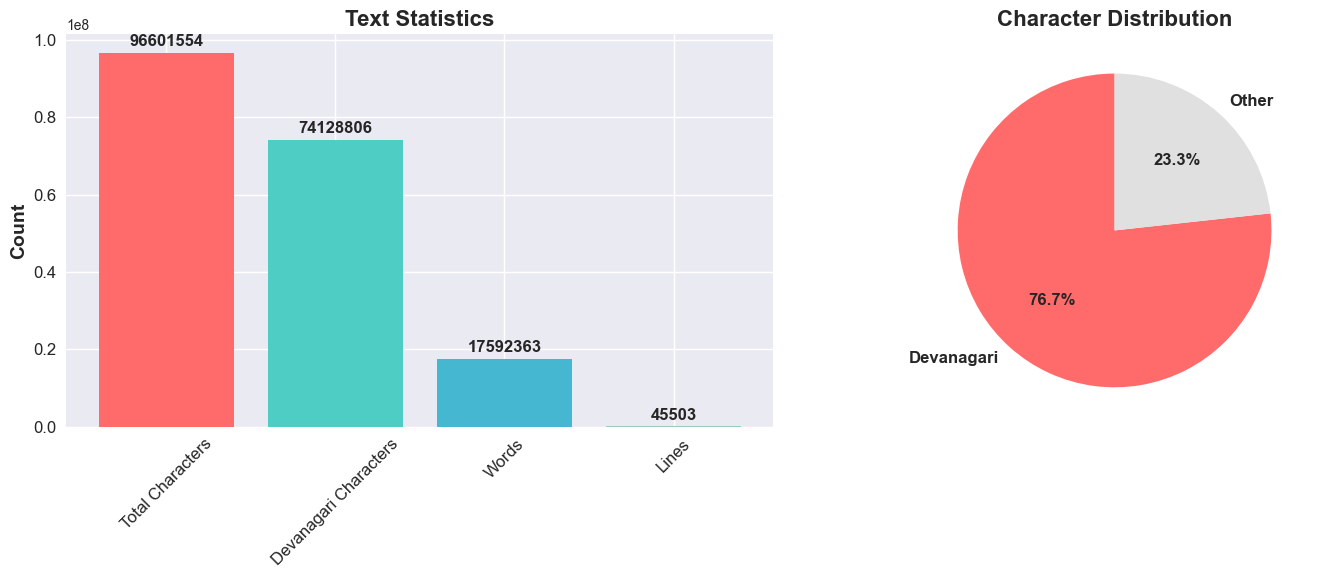

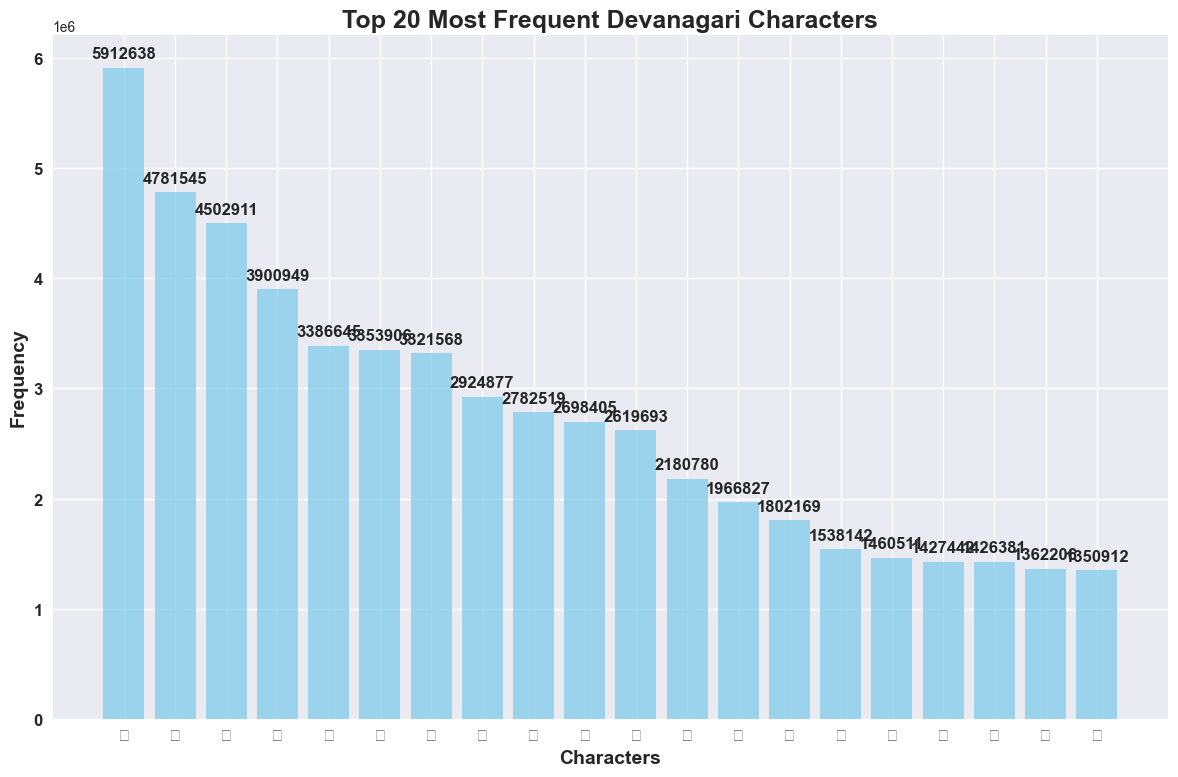

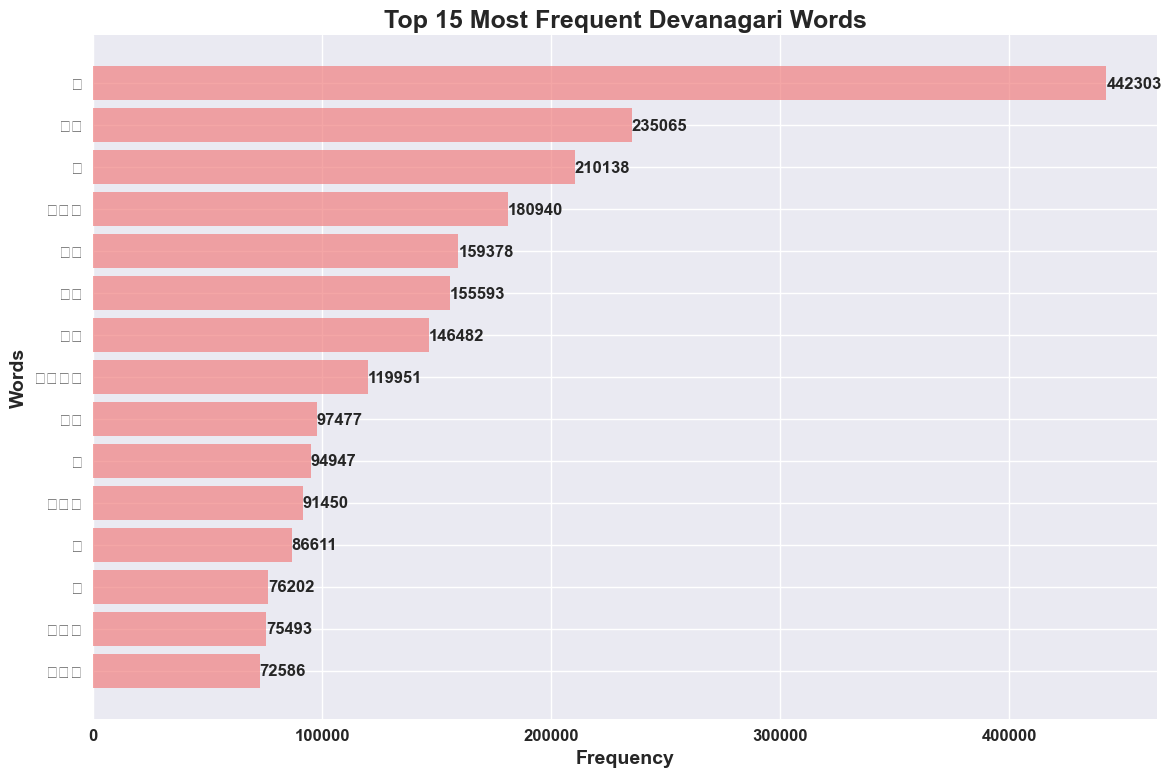

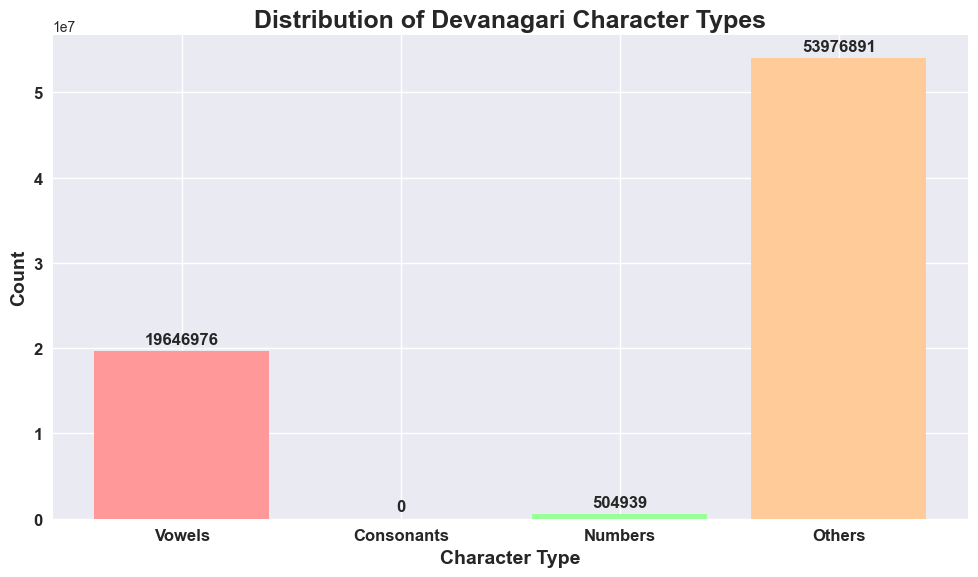

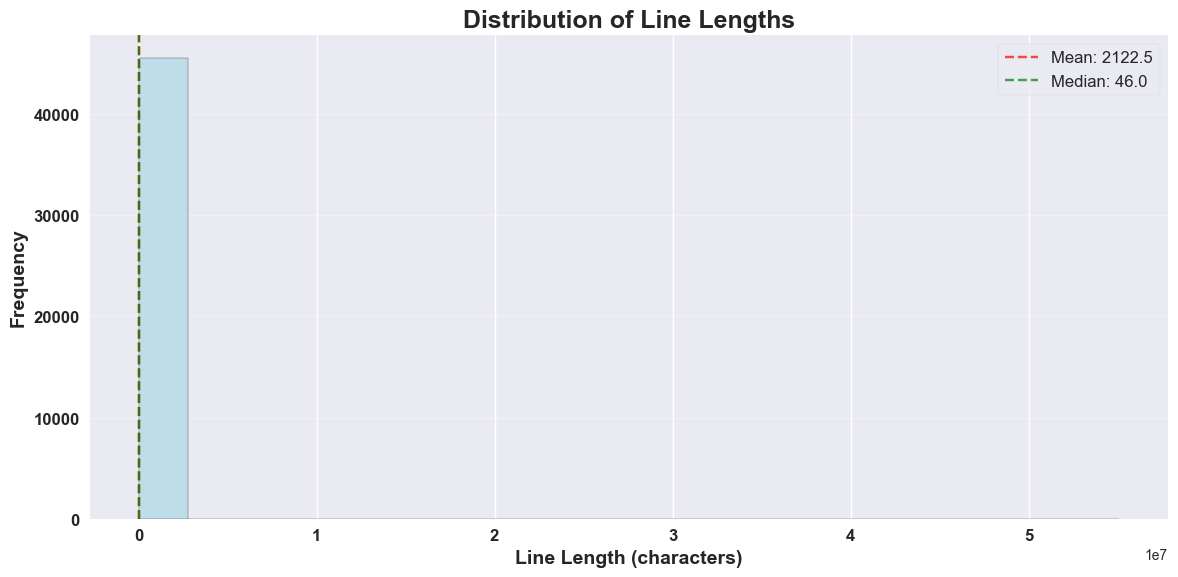

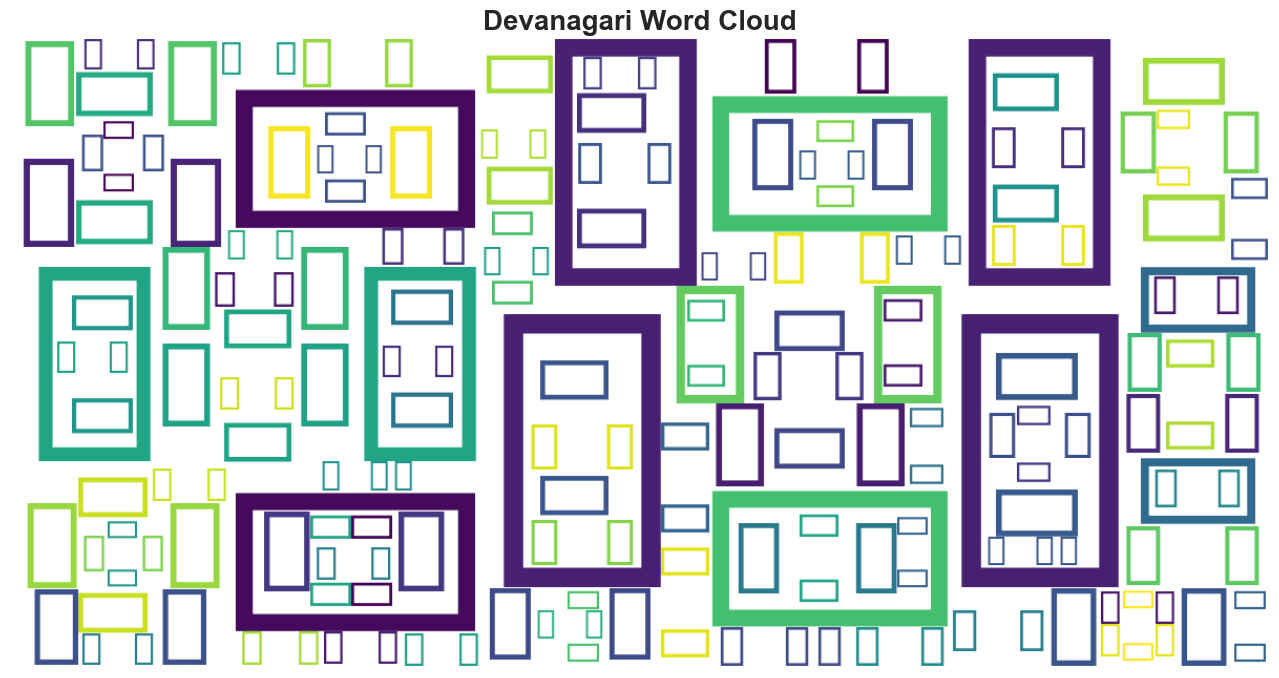

Analysis complete!


In [19]:

# Generate complete analysis
visualizer.generate_full_analysis()

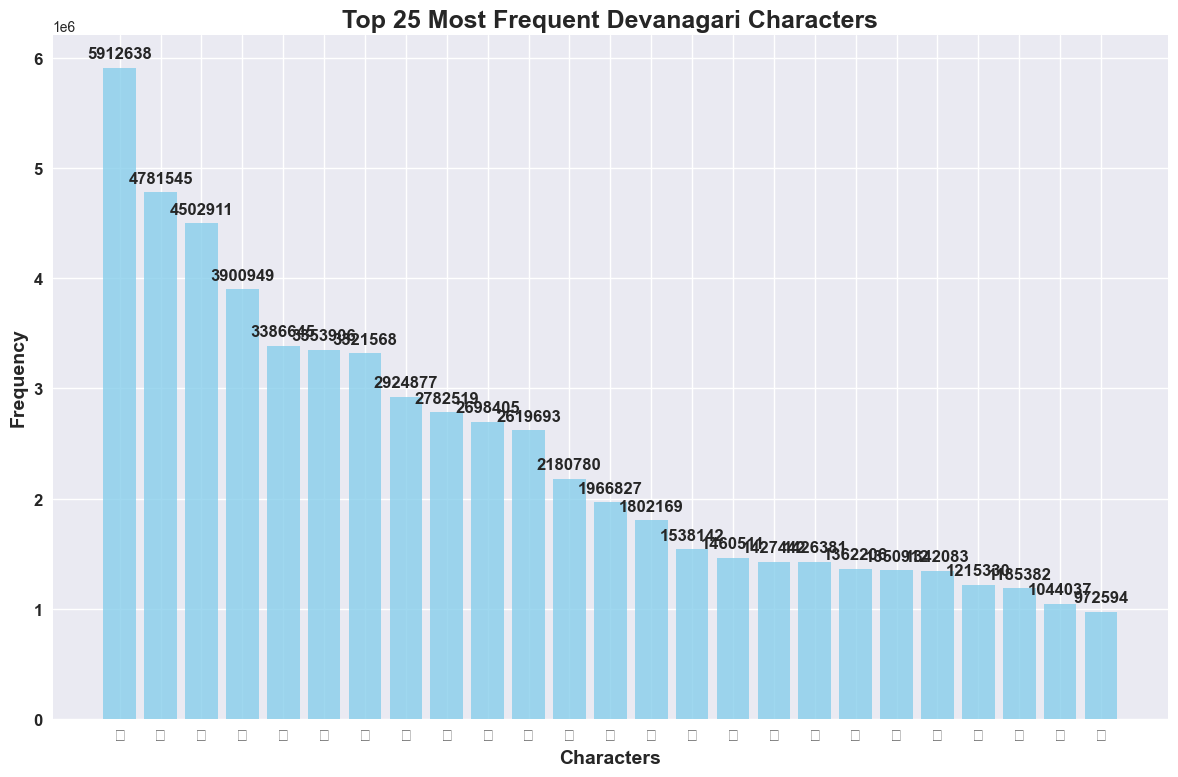

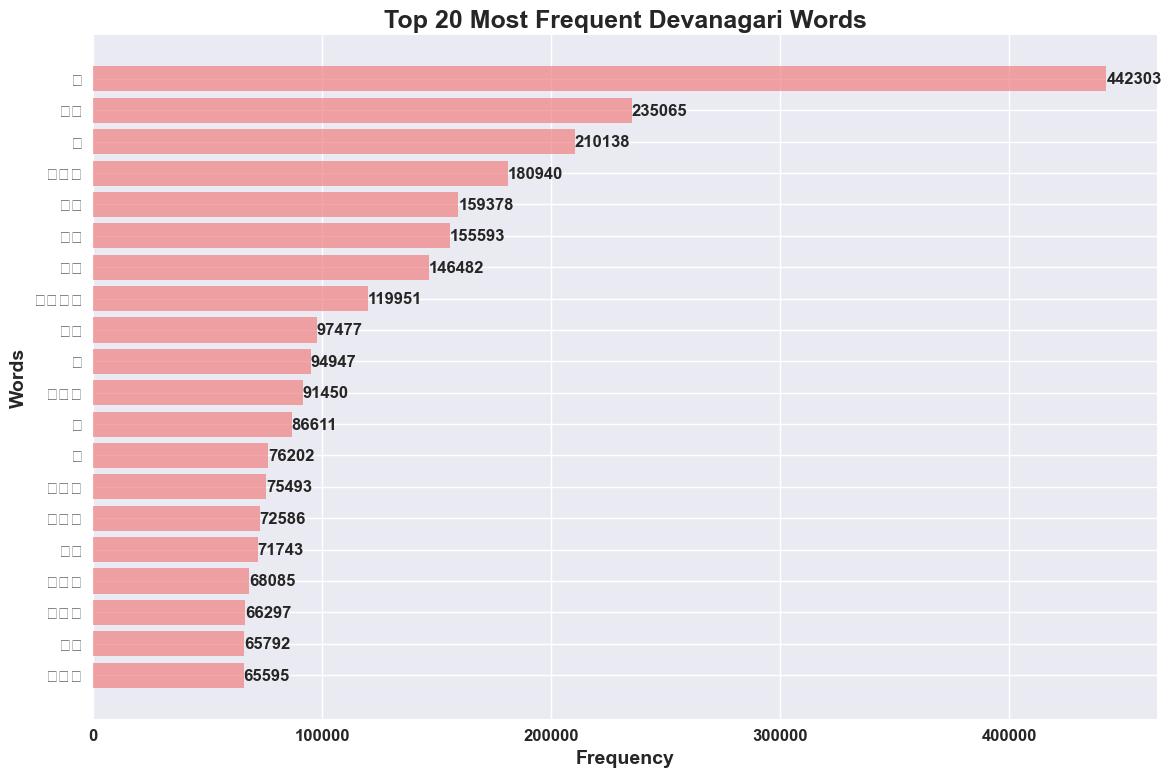

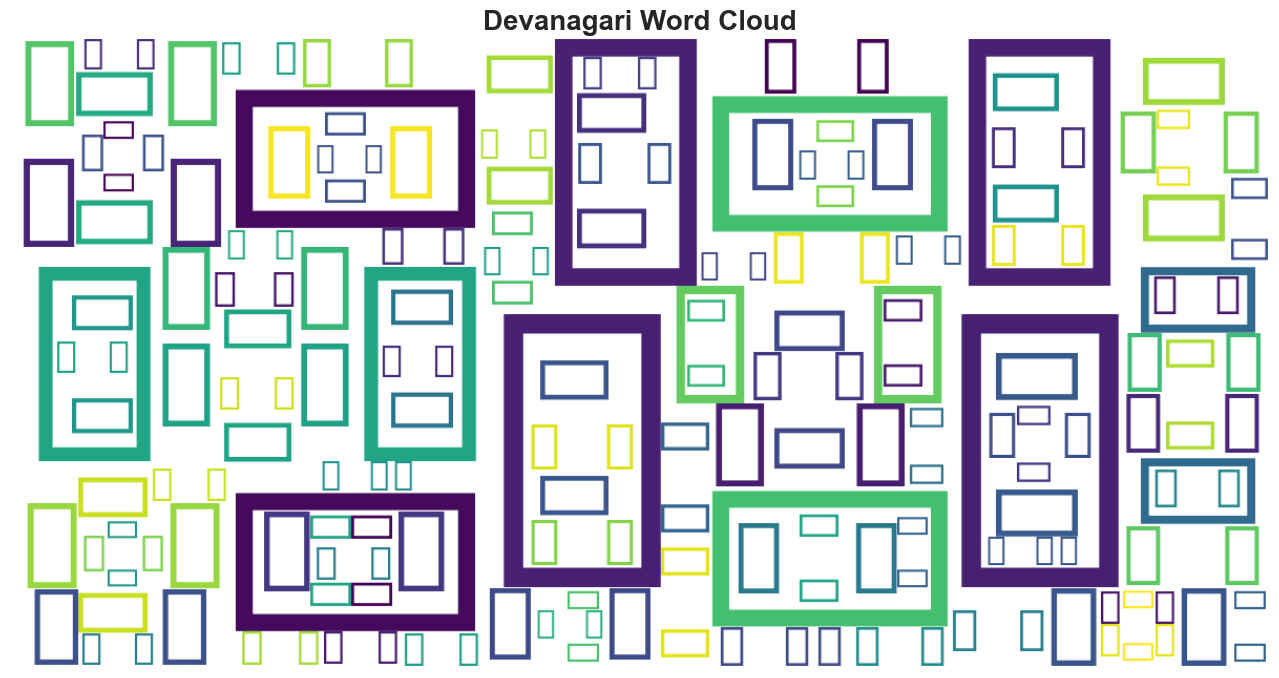

In [20]:

# Or use individual methods:
visualizer.plot_character_frequency(top_n=25)
visualizer.plot_word_frequency(top_n=20)
visualizer.create_wordcloud()